## Observations and Insights 

In this study, 249 mice identified with SCC tumor growth were treated through a variety of drug regimens. The dispersement of male to female mice is nearly even, with a 0.4% advantage to male mice usage in the study group. The Capumolin drug regimen did not have any abnormalities in the study data, and was a statistically significant to the study group and the effect it had on the tumor volume of each mice. Finally, Physical health of each subject has a high correlation on the positive effect of the tumor volume, having a 95% correlation with one another. This is also proven by the high r-sqaured value that returned a 90% measurement in the scatter plot below. The Capumolin drug can be effective when treating a tumor in each subject, 


In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt #mplot lib for pyplot
import pandas as pd
import scipy.stats as st
import numpy as np 
from sklearn import datasets 
from scipy.stats import linregress
# Study data files
mouse = "mouse.csv"
study = "study.csv"

# Read the mouse data and the study results
mouse = pd.read_csv(mouse)
study = pd.read_csv(study)

# Combine the data into a single dataset
data_df = pd.merge(mouse, study, on="Mouse ID", how="left")

#Dropping any unknown values from the data set 
data_df = data_df.dropna(how='any')

# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [51]:
#Printing a statistical overview of the data set 
data_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [52]:
# Checking the number of mice.
mouse_count = data_df['Mouse ID'].count()
#Creating a bin for the mouse count 
mouse_bin = {'Mouse Count':[mouse_count]}

#Creating a dataframe for the count 
mouse_bin = pd.DataFrame(mouse_bin)

#Displaying the dataframe
mouse_bin 

,Mouse Count
0,1893


In [53]:
# Getting the duplicate mice by ID number that shows up for Mouse ID Timepoint. 
unique_mice = data_df[data_df.duplicated(["Mouse ID","Timepoint"])]

unique_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [54]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = data_df.drop_duplicates(['Mouse ID','Timepoint'],keep='last').sort_index()

#Displaying the dat frame 
clean_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [55]:
# Checking the number of mice in the clean DataFrame.
clean_count = clean_data_df['Mouse ID'].count()

#Binning and Renaming the columns in the DataFrame 
clean_count_bin = {'Mouse Count':[clean_count]}

#Creating the DataFrame
clean_count_bin = pd.DataFrame(clean_count_bin)

#Displaying the DataFrame 
clean_count_bin

,Mouse Count
0,1888



## Summary Statistics

In [56]:
#Calulating the Standard Error Mean for Tumor Volume for each Drug Regimen
sem_data = clean_data_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()

#Setting a variable equal to the calculated SEM
sem_summary = sem_data

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_table = clean_data_df.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)":
                                                          [np.mean, 
                                                           np.median, 
                                                           np.var, 
                                                           np.std,
                                                          ]
                                                         })

#Creating a dataframe 
stat_table = pd.DataFrame(stat_table)

#Adding SEM Column into the Summary Statistics table
stat_table['SEM of Tumor Volume (mm3)'] = sem_summary

#Dropping a level of the multi-index that was created from the agg function
stat_table.columns = stat_table.columns.droplevel()

#Renaming my column headers to give the data the correct labels
stat_table = stat_table.rename(columns={"mean":"Mean",
                                       "median":"Median",
                                       "var":"Variance",
                                       "std":"Std. Deviation",
                                       "":"SEM"})


#Adding a comment to give the table a Name 
stat_table.style.set_caption("TUMOR VOLUME (MM3) SUMMARY STATISTICS")

,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

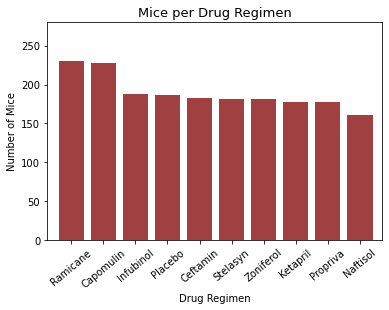

<Figure size 432x288 with 0 Axes>

In [57]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#Grabbing a count of mice from the cleaned up dataframe without duplicates 
mouse_count = data_df['Drug Regimen'].value_counts()

#unique strings for drug regimen 
drug_reg = data_df['Drug Regimen'].unique()

#Sets the x-axis labels to the unique drug regimen names listed in the data set 
x_axis = np.arange(0, len(drug_reg))

#empty that will hold the x-axis tick locations 
tick_locations = [] 

#for loop that will store each unique drug regiment on the x-axis 
for x in x_axis: 
    tick_locations.append(x)

#giving title/labels to the bar grap using pyplot 
plt.title("Mice per Drug Regimen",fontsize=13,fontweight='light')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

#Setting the x limits of the bar graph
plt.xlim(-.75, len(drug_reg)-.30)

#counter space for our y-axis 
plt.ylim(0, max(mouse_count)+50)

#styling the graph 
plt.bar(x_axis, mouse_count,facecolor="maroon",alpha=0.75, align="center")


#assigning tick values generated from our for loop 
plt.xticks(tick_locations,drug_reg, fontsize=10,rotation=40,horizontalalignment="center")

#showing the graph 
plt.show()

plt.savefig('Barp_Matplot.png')



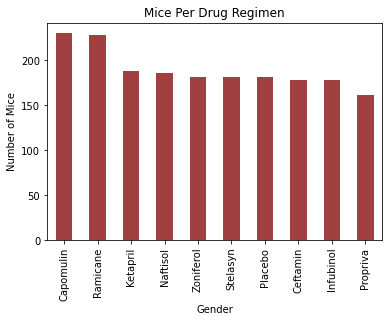

<Figure size 432x288 with 0 Axes>

In [58]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#Using the data generated from the previous cell
panda_bar_chart = mouse_count.plot(kind="bar",color="maroon",alpha=0.75,title="Mice Per Drug Regimen")

#labeling my x axis 
panda_bar_chart.set_xlabel("Gender")

#labeling my y axis 
panda_bar_chart.set_ylabel("Number of Mice")

#showing my graph 
plt.show()

plt.savefig('Barp_Pandas.png')

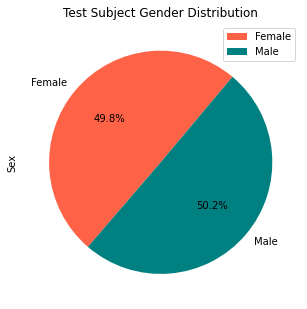

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_groups = mouse.groupby('Sex')

#Putting the gender count into a dataFrame 
gender_count = pd.DataFrame(gender_groups['Sex'].count())

#Giving colors to female and male groups 
#female = tomato
#male = teal 
colors = ["tomato","teal"]

#Creating and displaying our pie chart 
pie_chart = gender_count.plot.pie(y="Sex",colors=colors,title="Test Subject Gender Distribution",autopct='%1.1f%%', figsize=(5,8),
                                 shadow=False,startangle=50
                                )

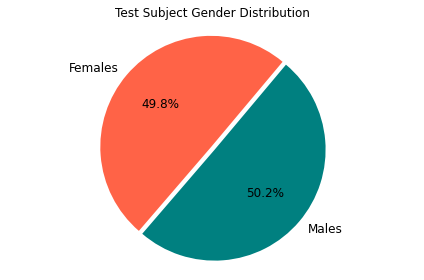

<Figure size 432x288 with 0 Axes>

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt_labels = ["Females","Males"]

#Since we know the count we can avoid an error message by manually entering the count
#and enter an array ourselves 
plt_gender = [124,125]

#Setting my pie chart colors 
colors = ["tomato","teal"]

#Telling matplotlib to separate female from male group 
explode = (0.02,0)

#Creating the pie chart 
plt.pie(plt_gender,explode=explode, labels=plt_labels, colors=colors, autopct="%1.1f%%",shadow=False,startangle=50,radius=.5,
       textprops={'size':'larger'})

#adding title 
plt.title("Test Subject Gender Distribution")

#Telling matplot lib that we want a pie chart with equal axes 
plt.axis("equal")

#Resizing the plot to display labels 
plt.tight_layout()

#Displaying our pie chart 
plt.show()

#Saving the figure as a png file 
plt.savefig("MousePyPlot.png")

## Quartiles, Outliers and Boxplots

In [61]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 

# Capomulin, Ramicane, Infubinol, and Ceftamin

#Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement
tumor_group = clean_data_df.groupby(['Mouse ID','Drug Regimen']).max()['Timepoint']

tumor_group = pd.DataFrame(tumor_group)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_df = pd.merge(tumor_group,data_df, on=("Mouse ID", "Timepoint"), how="left")

#Creating a data frame from the merged function
tumor_vol_df = pd.DataFrame(tumor_vol_df)

#Displaying the data frame 
tumor_vol_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [62]:
#Setting a different variable equal to the merged data frame 
drug_index = tumor_vol_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']

drug_index.head()

# Turn retrieved data into dataframe to easily manipulate
drug_index = drug_index.to_frame()

drug_index


Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Zoniferol    q633               70.827796
             s337               62.109651
             w140               47.717952
             w575               68.401286
             x613               48.077646

[249 rows x 1 columns]

In [63]:
#Label list for my drug regimens 
drug_reg = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

#Resetting my index so that I can loop through my values and select the list values creates for my labels
box_plot_df = drug_index.reset_index()

#Grouping the data by Drug regiment and Tumor Volume (mm3)

#.apply functions enables us to apply the list to the variable vol_list from the data selectedin the group by function
# This puts in all of the values of the of our final tumore value in an array list with the specific drug regimen 
vol_list = box_plot_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)

#putting this list into a data frame 
vol_list_df = pd.DataFrame(vol_list)



In [64]:
#Using the created drug regimen list and resizing the data frame to contain only those values 

#This is done by using the reindex function 
vol_list_df = vol_list_df.reindex(drug_reg)

#Showing and checking that those values are being returned 
vol_list_df


,Tumor Volume (mm3)
Drug Regimen,
Capomulin,"[38.98287774, 38.93963263, 30.48598484, 37.074..."
Ramicane,"[38.407618299999996, 43.04754260000001, 38.810..."
Infubinol,"[67.97341878, 65.52574285, 57.03186187, 66.083..."
Ceftamin,"[62.99935619, 45.0, 56.05774909, 55.74282869, ..."


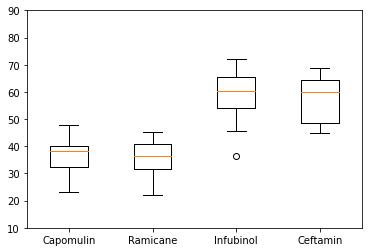

In [65]:
#initiating for loop to loop through and find the tumor volume 

#tumor volume = vol_tum, this will append each value to this variable 
vol_tum = [x for x in vol_list_df['Tumor Volume (mm3)']]

#Creating the box plot 
plt.boxplot(vol_tum, labels=drug_reg)

#Setting the limits of the box plot for a clean presentation 
plt.ylim(10,90)

#showing the box plot 
plt.show()

In [79]:
# Since data is in a data frame we are able to use pandas and give quartile calculations 
qua_vol = tumor_vol_df['Tumor Volume (mm3)']

quartiles = qua_vol.quantile([.25,.5,.75])

lowerq = quartiles[0.25]

upperq = quartiles[0.75]

iqr = upperq-lowerq

#Printing the lower quartile of the data frame that is grouped by the last tumor measurement 
print(f"The lower quartile of Tumor Volume (mm3) is: {round(lowerq,4)}")

#Upper quartile from the same data frame 
print(f"The upper quartile of Tumor Volume (mm3) is: {round(upperq,4)}")

#The interquartile 
print(f"The interquartile range of Tumor Volume (mm3) is: {round(iqr,4)}")

#The median tumor volume 
print(f"The the median of Tumor Volume (mm3) is: {round(quartiles[0.5],4)} ")

#Formulas that test that calculate the lower and upper outliers 
lower_bound = lowerq - (1.5*iqr)

upper_bound = upperq + (1.5*iqr)

#displaying the results of lower and upper outliers 
print(f"Values below {round(lower_bound,4)} could be outliers.")

print(f"Values above {round(upper_bound,4)} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 45.9347
The upper quartile of Tumor Volume (mm3) is: 64.9576
The interquartile range of Tumor Volume (mm3) is: 19.0228
The the median of Tumor Volume (mm3) is: 55.8414 
Values below 17.4004 could be outliers.
Values above 93.4918 could be outliers.


## Line and Scatter Plots

In [42]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Isolating the Drug Regiment Capomulin so that I can find a mouse ID associated with the drug 
cap_data = clean_data_df.loc[clean_data_df['Drug Regimen']=="Capomulin"]

#Displaying the results 
cap_data = pd.DataFrame(cap_data)

#Displaying the data set 
cap_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


Text(0.5, 1.0, 'Capomulin Treatment: Tumor Volume vs Timepoint')

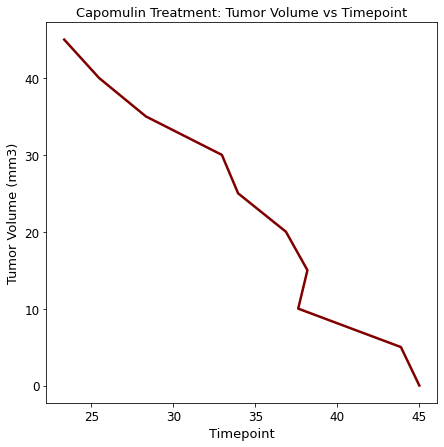

In [43]:
#Locating the specific mouse id 
mouse_cap_data = cap_data.loc[cap_data['Mouse ID']=="s185"]

#Dropping my columns from the data frame for future line graph constructions
mouse_cap_data = mouse_cap_data.drop(['Drug Regimen','Mouse ID','Sex','Age_months','Weight (g)','Metastatic Sites'],axis=1)

#Setting my index to the Timepoint then plotting against the Tumor Volume recorded for the mouse under Capomulin treatment 
mouse_cap_data.set_index('Tumor Volume (mm3)')['Timepoint'].plot(kind="line",figsize=(7,7), linewidth=2.5, color='maroon',fontsize=12)

#labeling my line graph with x, y, and title labels
plt.ylabel("Tumor Volume (mm3)",fontsize=13)

plt.xlabel("Timepoint", fontsize=13)

plt.title("Capomulin Treatment: Tumor Volume vs Timepoint",fontsize=13)



In [44]:
#I will be using the data set that I created in cell 79, done so, by locating the Capomulin Drug Regimen 
cap_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [45]:
#Dropping columns from the data set 
mouse_scatt = cap_data.drop(['Mouse ID','Drug Regimen','Sex','Age_months','Timepoint','Metastatic Sites'],axis=1)

#Creating a dataframe for this specific set 
mouse_scatt = pd.DataFrame(mouse_scatt)

#Setting a variable equal to the column list Tumor Volume (mm3)
scatt_y = mouse_scatt['Tumor Volume (mm3)']

#converting cubic millimeters to grams using a for loop 
point_scatt = [(x/1000) for x in scatt_y]

#Creating new column index for the converted value 
mouse_scatt["Tumor Volume (g)"] = point_scatt

#dropping the tumor volume that is measued in cubic millimeters 
mouse_scatt = mouse_scatt.drop(['Tumor Volume (mm3)'], axis=1)

#displaying the data set 
mouse_scatt = mouse_scatt.groupby(['Weight (g)']).agg({'Tumor Volume (g)':"mean"})

#Resetting index so that Weight (g) can become a column of the dataframe 
mouse_scatt = mouse_scatt.reset_index()

#Renaming my keys columns directly 
mouse_scatt.columns = ['Weight','Tumor Volume']



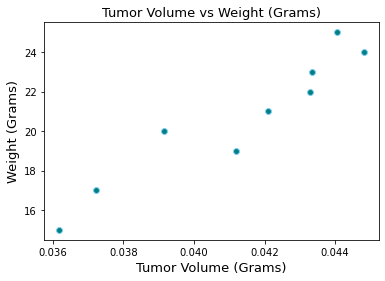

In [46]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#using the .iloc function to gather the values in the specific column for both weight and tumor volume
weight = mouse_scatt.iloc[:,0]

tumor_vol = mouse_scatt.iloc[:,1]

#Creating the scatter plot with some styling 
plt.scatter(tumor_vol,weight, marker="o", facecolors="teal",edgecolors="lightskyblue")

#x-label 
plt.xlabel('Tumor Volume (Grams)',fontsize=13)

#y-labe 
plt.ylabel('Weight (Grams)',fontsize=13)

#title for the graph 
plt.title('Tumor Volume vs Weight (Grams)',fontsize=13)

#showing the graph 
plt.show()

#saving the figure 
plt.savefig("Tumor Scatter.png")

## Correlation and Regression

In [47]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight, tumor_vol)

print(f"The correlation between both factors under the Capomulin Drug Regimen is {round(correlation[0],2)}.")


The correlation between both factors under the Capomulin Drug Regimen is 0.95.


the r-squared is: 0.9034966277438606


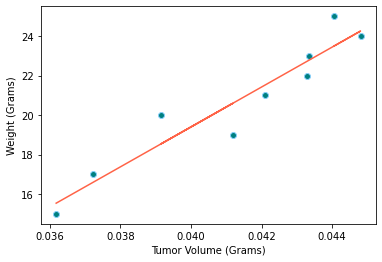

In [48]:
#Creating the linear regression model 
x_values_lr = mouse_scatt['Tumor Volume']

#y-value are linked to the weight of the mouse 
y_value_lr = mouse_scatt['Weight']

#linear regression equation 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_lr, y_value_lr)

#setting the regression values = to the regression equation
regress_values = x_values_lr * slope + intercept 

line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept, 2))

#Creating the scatter plot and adding some styling to is 
plt.scatter(x_values_lr, weight,color="teal",edgecolor="lightskyblue")

#plotting the values 
plt.plot(x_values_lr, regress_values, "r-",color="tomato")

#x-label for the tumor volume 
plt.xlabel("Tumor Volume (Grams)")

#y-label for the weight 
plt.ylabel("Weight (Grams)")

#printing our r value 
print(f"the r-squared is: {(rvalue**2)}")

#showing the linear regression graph 
plt.show()